In [1]:
from stereo3d import stereo3d_read_from_zips as std_read
from parsivel import pars_read_from_zips as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from pathlib import Path
import numpy as np 
stereo_datafolder = "/home/marcio/stage_project/data/Daily_raw_data_3D_stereo"
pars_datafolder = "/home/marcio/stage_project/data/Pars_1"
beg = 20230821000000
end = 20231022235930

# Read all the data and extract one event

In [3]:
# Read the main parsivel series
parsivel_series = pars_read(beg, end, pars_datafolder)
stereo_series = std_read(beg, end, stereo_datafolder)

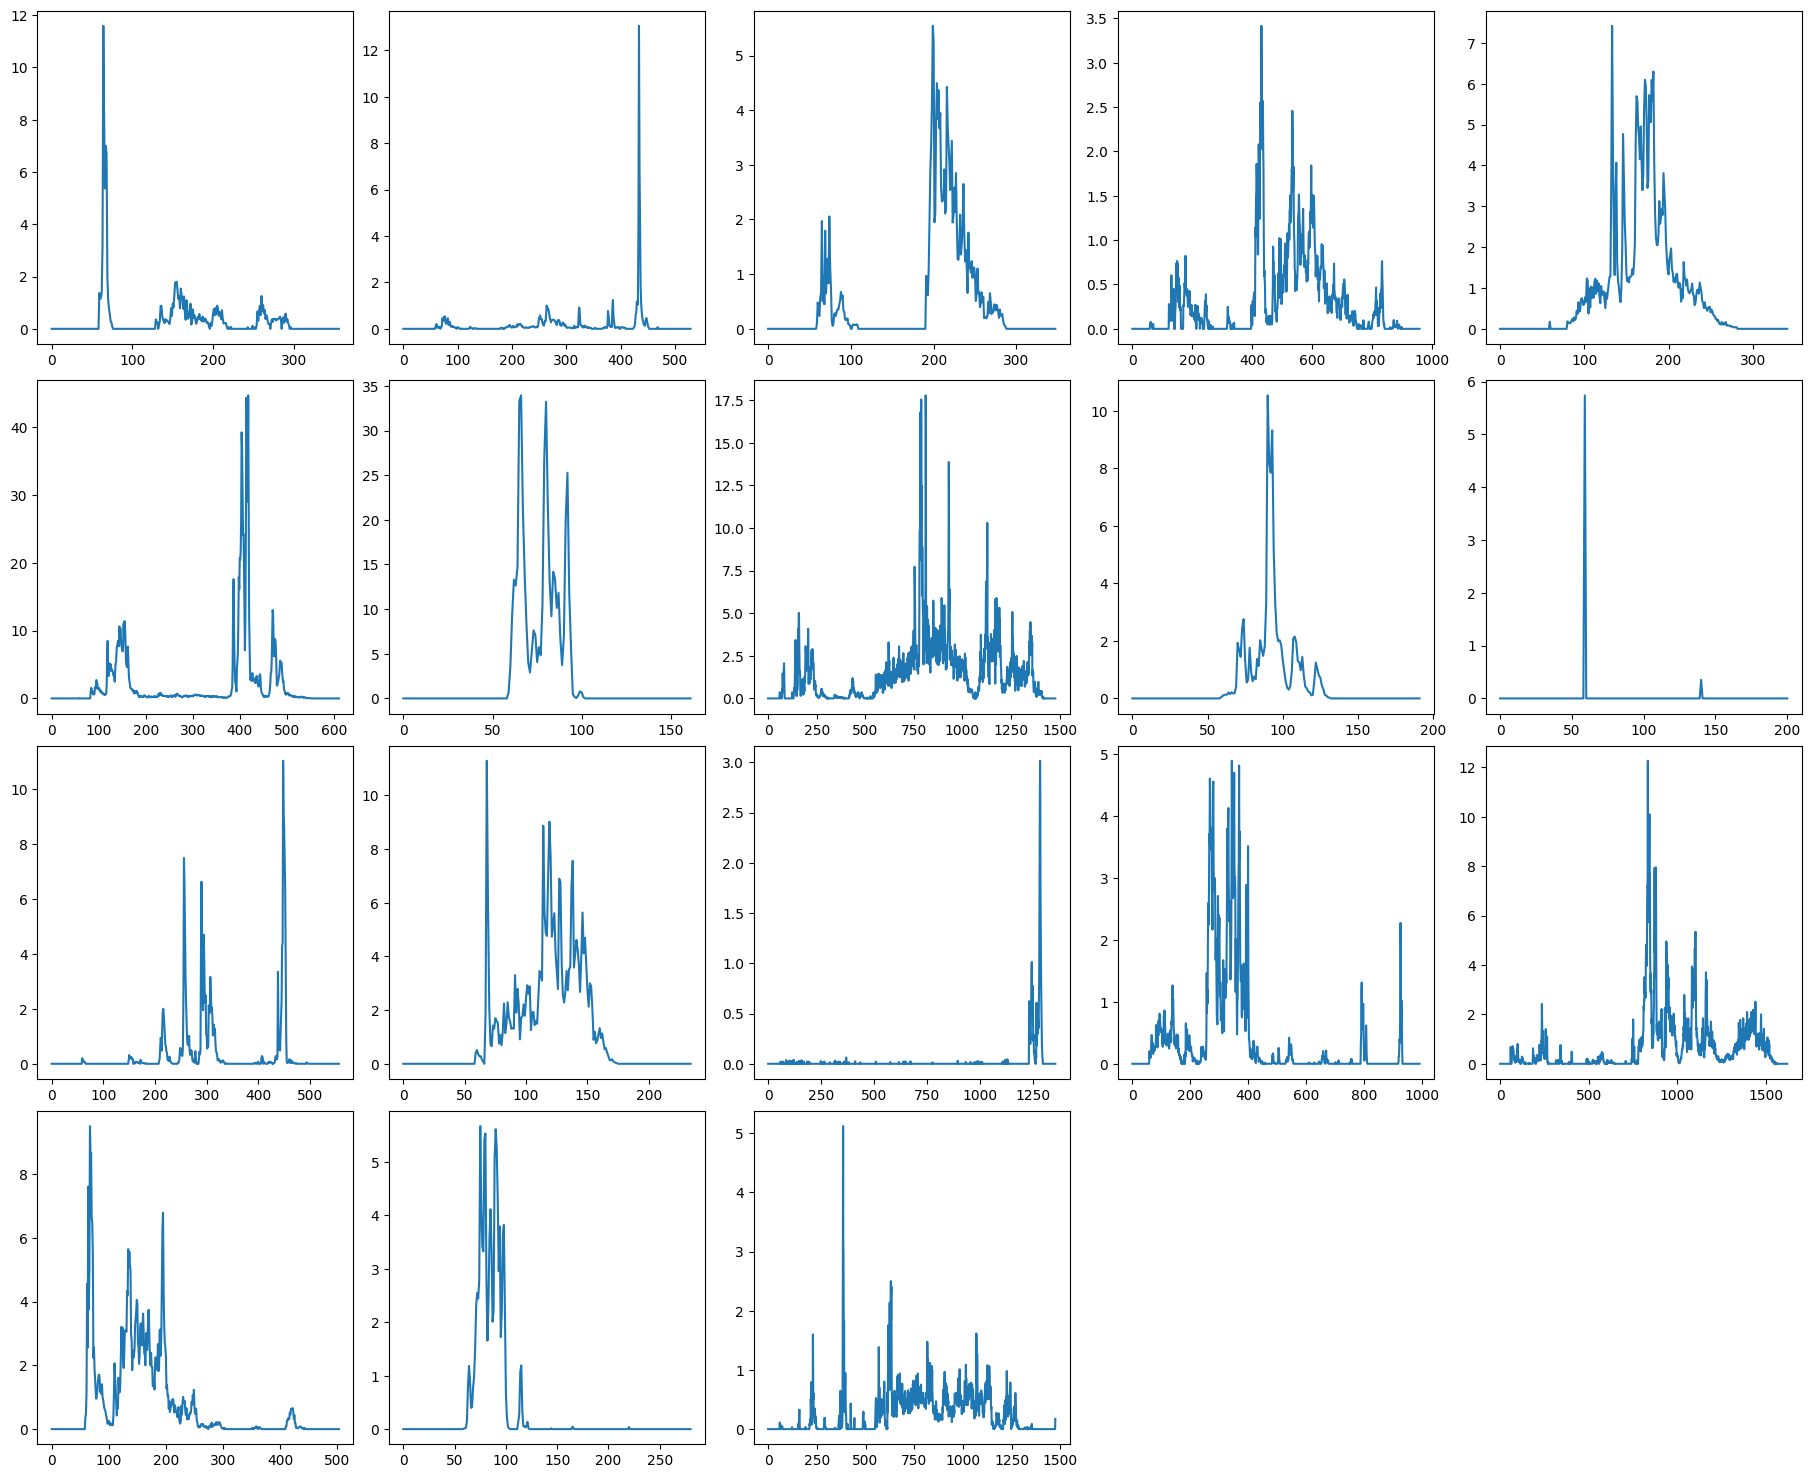

In [16]:
parsivel_events = parsivel_series.exstract_events(0, 30, 0.7)
n = int(np.ceil(len(parsivel_events)**0.5))
figure = plt.figure()
figure.set_size_inches((n*3 +3, n*3 + 3))
figure.set_constrained_layout(True)
for i, event in enumerate(parsivel_events):
    ax = figure.add_subplot(n,n, i + 1)
    ax.plot(event.rain_rate)

In [17]:
len(parsivel_events)

18

#### Select event from Stereo 3D

In [18]:
stereo_events = stereo_series.extract_events([pars_event.duration for pars_event in parsivel_events])
all(pars_event.duration == stereo_event.duration for pars_event, stereo_event in zip(parsivel_events, stereo_events))

True

### Save the event for stereo 3D and parsivel

Filter for outliers

In [19]:
outliers = [i for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)) if pars_event.total_depth > 10000 or stereo_event.total_rain_depth > 10000]
for i, idx in enumerate(outliers):
    parsivel_events.pop(idx - i)
    stereo_events.pop(idx - i)
outliers

[1, 17]

In [20]:
pars_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events")
stereo_folder = Path("/home/marcio/stage_project/data/saved_events/stereo_events")
# Clear the folders from previous use
for file in pars_folder.iterdir():
    file.unlink()
for file in stereo_folder.iterdir():
    file.unlink()
for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)):
    pars_event.to_pickle(pars_folder / f"event{i+1:>02}.obj")
    stereo_event.to_pickle(stereo_folder / f"event{i+1:>02}.obj")